# 14wk-61: NLP with Disaster Tweets / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

[???](???)

# 2. Imports

In [2]:
#!pip install autogluon.eda

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#---#
from autogluon.tabular import TabularPredictor
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [4]:
!kaggle competitions download -c nlp-getting-started

100%|████████████████████████████████████████| 593k/593k [00:00<00:00, 2.47MB/s]
100%|████████████████████████████████████████| 593k/593k [00:00<00:00, 2.46MB/s]

In [5]:
!unzip nlp-getting-started.zip -d data 

Archive:  nlp-getting-started.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          

In [6]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [7]:
!rm -rf data
!rm nlp-getting-started.zip

# 4. 분석

In [8]:
df_train.head()

In [9]:
df_test.head()

In [15]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'target')
# step3
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_test) 

No path specified. Models will be saved in: "AutogluonModels/ag-20231207_031213"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
    Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
    presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
    presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
    presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
    presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231207_031213"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC

# 5. 제출

In [18]:
sample_submission

In [19]:
sample_submission['target'] = yhat 
sample_submission.to_csv("submission.csv",index=False)

In [20]:
!kaggle competitions submit -c nlp-getting-started -f submission.csv -m "오토글루온, TabularPredictor"

100%|██████████████████████████████████████| 22.2k/22.2k [00:02<00:00, 10.4kB/s]
Successfully submitted to Natural Language Processing with Disaster Tweets

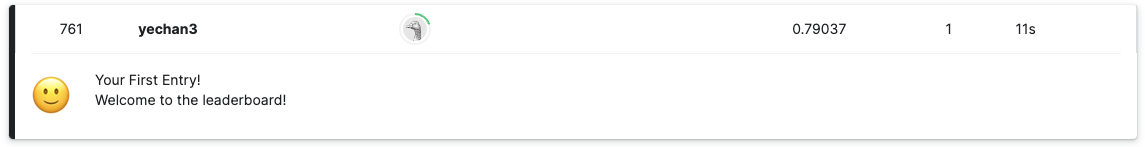

In [21]:
761/1094

별로네..